In [25]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense,MaxPooling2D,BatchNormalization
from keras.models import load_model

In [26]:
batch_size=32

train_datagen = image.ImageDataGenerator(
  rescale=1./255,
  rotation_range=30,
  validation_split=0.2,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  fill_mode='wrap'
)
def generate(subset='training', data_dir='../data', shuffle=False, target_size=(24,24), color_mode='grayscale', class_mode='categorical'):
  return train_datagen.flow_from_directory(data_dir, batch_size=batch_size, target_size=target_size, color_mode=color_mode, class_mode=class_mode, shuffle=shuffle, subset=subset)
train_data = generate(subset='training', shuffle=True)
validation_data = generate(subset='validation')

steps_per_epoch = len(train_data.classes) // batch_size
validation_steps= len(validation_data.classes) // batch_size
print(f"steps_per_epoch {steps_per_epoch}, validation_steps {validation_steps}")

Found 39562 images belonging to 2 classes.
Found 9890 images belonging to 2 classes.
steps_per_epoch 1236, validation_steps 309


In [27]:
def CNN():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
        MaxPooling2D(pool_size=(2,2),strides=1),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2),strides=1),
 
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=1),

        Dropout(0.25),
   
        Flatten(),
    
        Dense(128, activation='relu'),
    
        Dropout(0.5),
    
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
    return model

In [28]:
CNN().model.summary()
model = CNN()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 64)       

/Users/skywrace/opt/anaconda3/envs/capstone-design-two/lib/python3.7/site-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [29]:
history=model.fit(train_data, validation_data=validation_data, epochs=15, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/15
1236/1236 [==============================] - 85s 68ms/step - loss: 0.2461 - accuracy: 0.8996 - val_loss: 0.2017 - val_accuracy: 0.9126
Epoch 2/15
1236/1236 [==============================] - 83s 67ms/step - loss: 0.1205 - accuracy: 0.9559 - val_loss: 0.2643 - val_accuracy: 0.9221
Epoch 3/15
1236/1236 [==============================] - 86s 70ms/step - loss: 0.0918 - accuracy: 0.9667 - val_loss: 0.0291 - val_accuracy: 0.9372
Epoch 4/15
1236/1236 [==============================] - 86s 70ms/step - loss: 0.0768 - accuracy: 0.9731 - val_loss: 0.0520 - val_accuracy: 0.9517
Epoch 5/15
1236/1236 [==============================] - 94s 76ms/step - loss: 0.0716 - accuracy: 0.9748 - val_loss: 0.0580 - val_accuracy: 0.9417
Epoch 6/15
1236/1236 [==============================] - 97s 79ms/step - loss: 0.0630 - accuracy: 0.9788 - val_loss: 0.1348 - val_accuracy: 0.9330
Epoch 7/15
1236/1236 [==============================] - 101s 82ms/step - loss: 0.0564 - accuracy: 0.9802 - val_loss: 0.0330 

Text(0.5, 0, 'epoch')

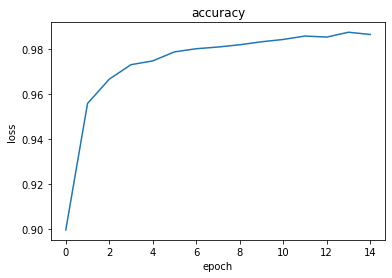

In [30]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

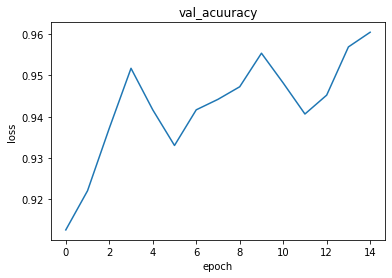

In [31]:
plt.plot(history.history['val_accuracy'])
plt.title('val_acuuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

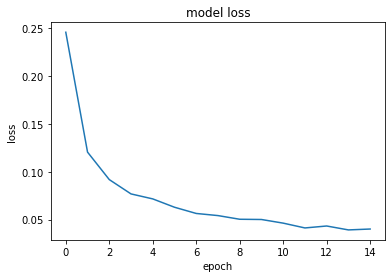

In [32]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

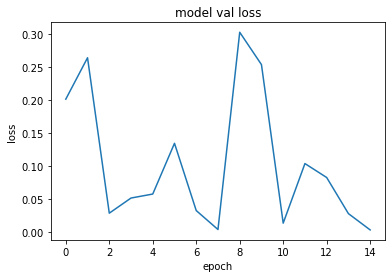

In [33]:
plt.plot(history.history['val_loss'])
plt.title('model val loss')
plt.ylabel('loss')
plt.xlabel('epoch')

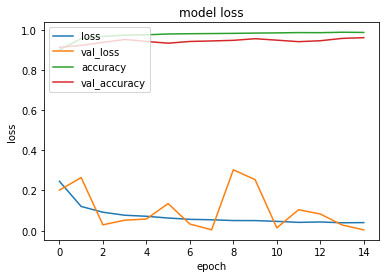

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [35]:
model.save('../model/extended_weight.h5', overwrite=True)